# **TASK-5 : CREDIT CARD FRAUD DETECTION**

> MOHD FAZAL HUSSAIN

> Batch: APRIL B5

> Domain: Data Science

# IMPORTING LIBRARIES

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  Exploratory Data Analysis (EDA)

In [51]:
df = pd.read_csv("CODSOFT/creditcard.csv")

In [52]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [54]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [55]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [61]:
# : Class 1 (Fraudulent) is very rare compared to Class 0

In [63]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
df.duplicated().sum()

1081

In [66]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# VISUALIZATION

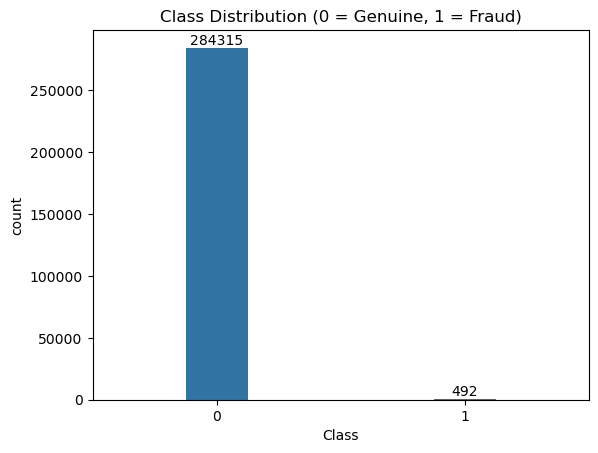

In [69]:
ax = sns.countplot(x='Class', data=df, width = 0.25)

for a in ax.containers:
    ax.bar_label(a)
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.show()

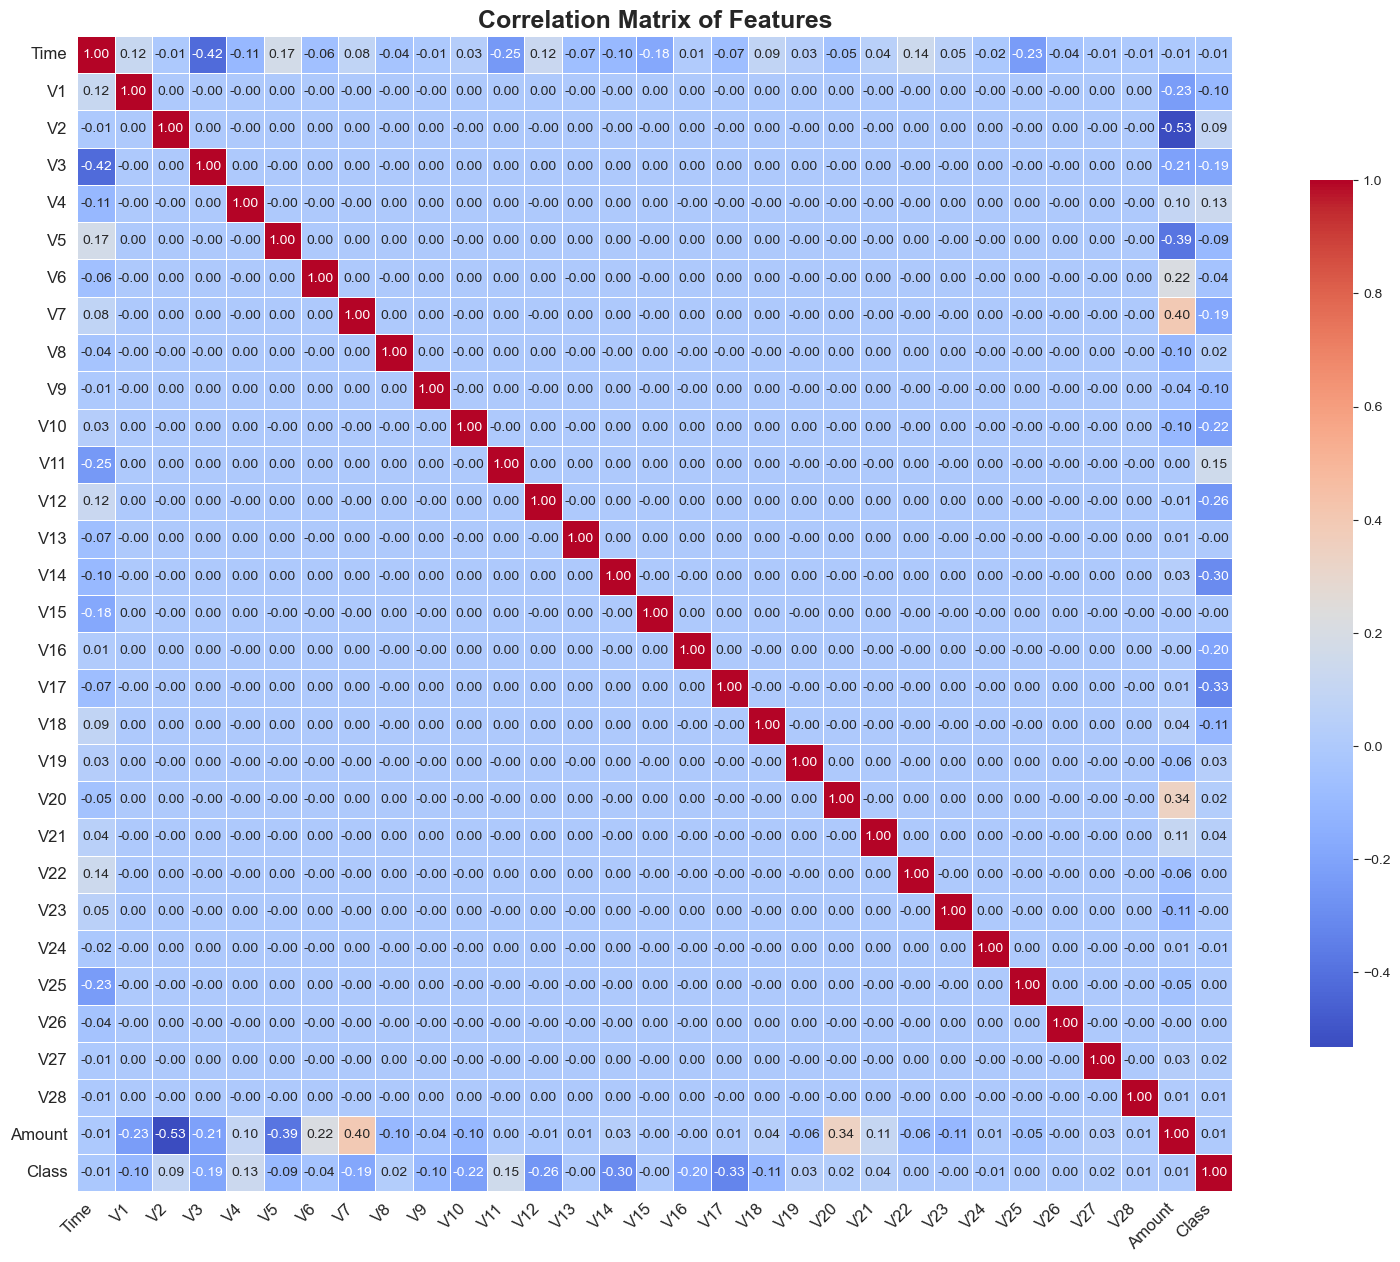

In [70]:
plt.figure(figsize = (20,15))

sns.set_style("whitegrid")

corr = df.corr()

ax = sns.heatmap(
    corr, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='white', 
    square=True, 
    cbar_kws={"shrink": .75}
)
plt.title('Correlation Matrix of Features', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [73]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

df = df.drop(columns=['Time'])

X = df.drop('Class', axis=1)
y = df['Class']

In [75]:
fraud = df[df['Class'] == 1]
genuine = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([fraud, genuine])

X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [76]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      492 non-null    float64
 1   V2      492 non-null    float64
 2   V3      492 non-null    float64
 3   V4      492 non-null    float64
 4   V5      492 non-null    float64
 5   V6      492 non-null    float64
 6   V7      492 non-null    float64
 7   V8      492 non-null    float64
 8   V9      492 non-null    float64
 9   V10     492 non-null    float64
 10  V11     492 non-null    float64
 11  V12     492 non-null    float64
 12  V13     492 non-null    float64
 13  V14     492 non-null    float64
 14  V15     492 non-null    float64
 15  V16     492 non-null    float64
 16  V17     492 non-null    float64
 17  V18     492 non-null    float64
 18  V19     492 non-null    float64
 19  V20     492 non-null    float64
 20  V21     492 non-null    float64
 21  V22     492 non-null    float64
 22  V2

In [77]:
genuine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 138028 to 95640
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      492 non-null    float64
 1   V2      492 non-null    float64
 2   V3      492 non-null    float64
 3   V4      492 non-null    float64
 4   V5      492 non-null    float64
 5   V6      492 non-null    float64
 6   V7      492 non-null    float64
 7   V8      492 non-null    float64
 8   V9      492 non-null    float64
 9   V10     492 non-null    float64
 10  V11     492 non-null    float64
 11  V12     492 non-null    float64
 12  V13     492 non-null    float64
 13  V14     492 non-null    float64
 14  V15     492 non-null    float64
 15  V16     492 non-null    float64
 16  V17     492 non-null    float64
 17  V18     492 non-null    float64
 18  V19     492 non-null    float64
 19  V20     492 non-null    float64
 20  V21     492 non-null    float64
 21  V22     492 non-null    float64
 22  

In [78]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382,1.0
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,1.026242,0.0
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,-0.353229,1.0
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,-0.349231,1.0
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,-0.316247,1.0
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,0.070128,1.0
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,8.146182,1.0


In [79]:
genuine.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,0.153312,0.009649,-0.038029,-0.027323,0.061966,-0.053962,0.013795,0.014911,0.037348,0.036243,...,0.014059,-0.020781,0.013223,-0.007257,0.024646,-0.027696,0.011070,-0.002305,-0.031990,0.0
std,1.703663,1.444666,1.374647,1.372193,1.170107,1.270228,0.929036,0.956193,1.131578,1.041515,...,0.740079,0.712191,0.466418,0.632845,0.531146,0.465194,0.302420,0.205858,0.711781,0.0
min,-10.979719,-8.372439,-7.679816,-4.519509,-4.643416,-5.078603,-5.157107,-13.396938,-3.044822,-2.686898,...,-2.446716,-3.678196,-1.415962,-2.836627,-2.356325,-1.178778,-1.919677,-1.831964,-0.353229,0.0
25%,-0.886609,-0.557728,-1.013043,-0.797339,-0.578016,-0.809724,-0.513647,-0.230213,-0.644018,-0.518436,...,-0.218049,-0.548167,-0.171455,-0.359669,-0.303849,-0.343016,-0.072520,-0.050755,-0.337237,0.0
50%,0.119505,0.059954,0.067108,-0.027450,0.046396,-0.267628,0.078284,0.016143,-0.040850,-0.073121,...,-0.023481,0.020152,-0.008901,0.043037,0.037298,-0.050608,-0.005048,0.010790,-0.273368,0.0
75%,1.477671,0.751157,0.952021,0.709696,0.603506,0.308306,0.573727,0.278094,0.683866,0.445037,...,0.160625,0.494733,0.158984,0.443805,0.354632,0.196191,0.070341,0.079316,-0.075832,0.0
max,2.351891,9.441250,3.143387,5.481640,7.044201,4.661863,3.424011,3.942467,5.232322,9.386945,...,13.250231,1.999206,6.008724,1.205581,1.957821,2.468952,2.175752,1.143922,5.503727,0.0


In [80]:
new_genuine = genuine.sample(n=492)
new_genuine

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165110,2.058394,-0.045552,-1.070594,0.412980,-0.121867,-1.199185,0.200692,-0.345355,0.513871,0.066547,...,-0.286549,-0.688130,0.333561,0.026281,-0.290829,0.196033,-0.070035,-0.059230,-0.335278,0
158353,2.103683,0.030503,-1.438682,0.328226,0.350531,-0.731849,0.022085,-0.319948,2.155384,-0.450026,...,0.087941,0.618465,-0.001470,0.418124,0.344582,-0.473183,-0.027784,-0.057568,-0.349231,0
177057,2.052500,0.060449,-1.817515,0.237443,0.569073,-0.399897,0.039466,-0.039657,0.336844,-0.192936,...,-0.338609,-0.931193,0.297277,0.170910,-0.267115,0.174362,-0.070460,-0.044793,-0.346073,0
120363,-4.666065,2.711403,-0.354697,-1.650268,-3.796976,-0.609154,-2.996684,3.334168,-0.831147,0.278484,...,-0.006171,0.004764,0.169043,0.405748,0.357861,1.105973,0.043159,0.027573,-0.283263,0
138383,1.262542,0.410052,0.299042,0.672246,-0.276618,-1.023532,0.135168,-0.242532,-0.076890,-0.304157,...,-0.283246,-0.778514,0.114191,0.309198,0.249275,0.095496,-0.018084,0.031703,-0.349671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90640,1.439755,-1.132433,0.689558,-1.566143,-1.380795,0.192639,-1.402329,0.132131,-1.928539,1.535336,...,0.003005,0.457738,-0.029303,-0.286978,0.302777,-0.072964,0.068430,0.011431,-0.311649,0
272928,1.718685,-0.230762,-1.860217,0.665098,0.118366,-1.430647,0.614811,-0.532205,0.330842,-0.599934,...,0.320684,0.779748,-0.192997,0.034818,0.241044,-0.128023,-0.025195,0.002931,0.362428,0
194731,-0.786132,-0.755688,-0.307451,-0.595725,1.932179,1.412155,0.939479,0.219069,-0.119378,-0.449550,...,0.638462,1.670998,0.264854,-0.922522,-0.433273,-0.024058,0.000185,-0.005548,0.422399,0
164247,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338,0


In [81]:
combined = pd.concat([new_genuine, fraud], axis = 0)
combined

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165110,2.058394,-0.045552,-1.070594,0.412980,-0.121867,-1.199185,0.200692,-0.345355,0.513871,0.066547,...,-0.286549,-0.688130,0.333561,0.026281,-0.290829,0.196033,-0.070035,-0.059230,-0.335278,0
158353,2.103683,0.030503,-1.438682,0.328226,0.350531,-0.731849,0.022085,-0.319948,2.155384,-0.450026,...,0.087941,0.618465,-0.001470,0.418124,0.344582,-0.473183,-0.027784,-0.057568,-0.349231,0
177057,2.052500,0.060449,-1.817515,0.237443,0.569073,-0.399897,0.039466,-0.039657,0.336844,-0.192936,...,-0.338609,-0.931193,0.297277,0.170910,-0.267115,0.174362,-0.070460,-0.044793,-0.346073,0
120363,-4.666065,2.711403,-0.354697,-1.650268,-3.796976,-0.609154,-2.996684,3.334168,-0.831147,0.278484,...,-0.006171,0.004764,0.169043,0.405748,0.357861,1.105973,0.043159,0.027573,-0.283263,0
138383,1.262542,0.410052,0.299042,0.672246,-0.276618,-1.023532,0.135168,-0.242532,-0.076890,-0.304157,...,-0.283246,-0.778514,0.114191,0.309198,0.249275,0.095496,-0.018084,0.031703,-0.349671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [83]:
combined['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

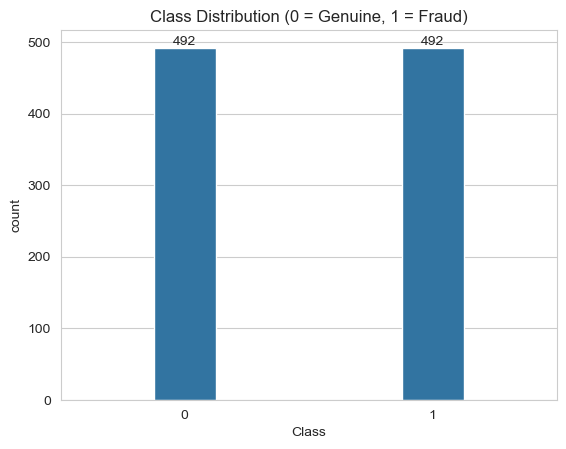

In [84]:
ax = sns.countplot(x='Class', data=combined, width = 0.25)

for a in ax.containers:
    ax.bar_label(a)
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.show()

In [97]:
x = combined.drop(columns = "Class", axis =1)
y = combined['Class']

In [100]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
165110,2.058394,-0.045552,-1.070594,0.412980,-0.121867,-1.199185,0.200692,-0.345355,0.513871,0.066547,...,-0.206347,-0.286549,-0.688130,0.333561,0.026281,-0.290829,0.196033,-0.070035,-0.059230,-0.335278
158353,2.103683,0.030503,-1.438682,0.328226,0.350531,-0.731849,0.022085,-0.319948,2.155384,-0.450026,...,-0.302897,0.087941,0.618465,-0.001470,0.418124,0.344582,-0.473183,-0.027784,-0.057568,-0.349231
177057,2.052500,0.060449,-1.817515,0.237443,0.569073,-0.399897,0.039466,-0.039657,0.336844,-0.192936,...,-0.170036,-0.338609,-0.931193,0.297277,0.170910,-0.267115,0.174362,-0.070460,-0.044793,-0.346073
120363,-4.666065,2.711403,-0.354697,-1.650268,-3.796976,-0.609154,-2.996684,3.334168,-0.831147,0.278484,...,-0.337678,-0.006171,0.004764,0.169043,0.405748,0.357861,1.105973,0.043159,0.027573,-0.283263
138383,1.262542,0.410052,0.299042,0.672246,-0.276618,-1.023532,0.135168,-0.242532,-0.076890,-0.304157,...,-0.032791,-0.283246,-0.778514,0.114191,0.309198,0.249275,0.095496,-0.018084,0.031703,-0.349671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302


In [102]:
y

165110    0
158353    0
177057    0
120363    0
138383    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# SPLITTING AND TRAINING DATA

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [107]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [109]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [111]:
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       148
           1       0.96      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix (Logistic Regression):
[[142   6]
 [ 11 137]]


In [113]:
print(" Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

 Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       148
           1       0.96      0.92      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix (Random Forest):
[[142   6]
 [ 12 136]]


## Confusion Matrix Heatmaps

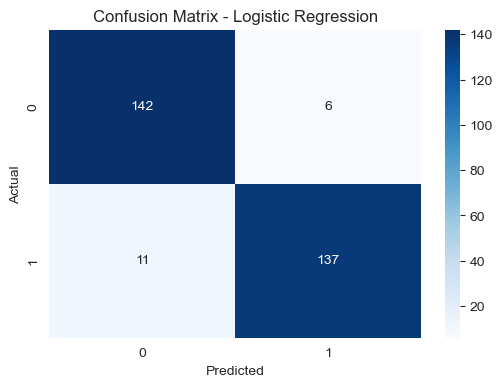

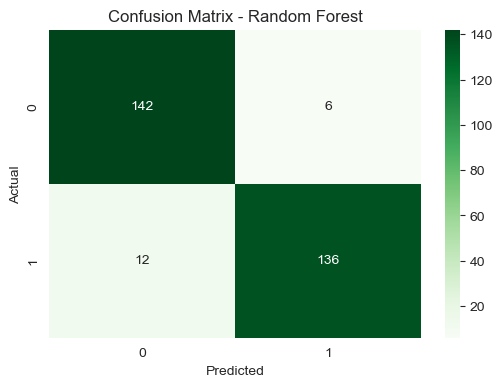

In [133]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Confusion Matrix Analysis

- Both Logistic Regression and Random Forest performed well in classifying fraud and genuine transactions.
- Logistic Regression caught 137 fraud cases correctly, missing 11.
- Random Forest caught 136 fraud cases correctly, missing 12.
- Overall, the performance is very similar, with a minor trade-off between precision and recall.
- Random Forest is still chosen for its robustness and higher overall F1-score, especially in larger datasets.


In [118]:
print("\nLogistic Regression Train Accuracy:", lr_model.score(X_train, y_train)*100)
print("Logistic Regression Test Accuracy:", lr_model.score(X_test, y_test)*100)

print("\nRandom Forest Train Accuracy:", rf_model.score(X_train, y_train)*100)
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test)*100)


Logistic Regression Train Accuracy: 95.63953488372093
Logistic Regression Test Accuracy: 94.25675675675676

Random Forest Train Accuracy: 100.0
Random Forest Test Accuracy: 93.91891891891892


## CONCLUSION

- Logistic Regression achieved high accuracy with minimal overfitting.
- Random Forest performed slightly better but showed some overfitting.
- Both models are effective, but Random Forest is selected for better performance.
- This project demonstrates how machine learning can help detect fraud in real-world datasets
